In [15]:
import pandas as pd
import numpy as np
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
import sklearn.datasets as dt
import seaborn as sns         
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
## k means to find the best number of group
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [5]:
## get dist_epitope
data1 = pd.read_csv("epitope_dist/HLAI_seqdist.csv")
data1=data1.groupby(['seq1','seq2'])['epitope_distance'].sum().reset_index()
## filter vaccine strain
data1 = data1[(data1['seq1'] != 'RSVB_pda_ancest') & (data1['seq2'] != 'RSVB_pda_ancest') &
             (data1['seq1'] != 'AF013255_vaccin') & (data1['seq2'] != 'AF013255_vaccin')]

## generate mirror matrix
data2 = data1 ## concate but switch seq1 and seq2
data=pd.concat([data1,data2.rename(columns={'seq1':'seq2','seq2':'seq1'})], ignore_index=True)
data= data.filter(['seq1','seq2','epitope_distance'])
data= data.pivot_table(index='seq1',columns='seq2',values='epitope_distance')
data=data.fillna(0)
data

FileNotFoundError: [Errno 2] No such file or directory: 'epitope_dist/HLAI_seqdist.csv'

In [13]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=0)## create mds module
results = mds.fit(data)
coords = results.embedding_
strain = data.columns

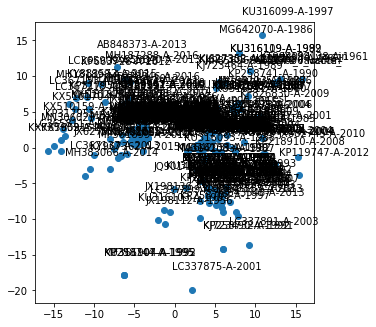

In [14]:
fig = plt.figure(figsize=(5,5))

plt.subplots_adjust(bottom = 0.1)
plt.scatter(coords[:, 0], coords[:, 1])

for label, x, y in zip(strain, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), 
        xytext = (-20, 20),
        textcoords = 'offset points'
    )
plt.show()

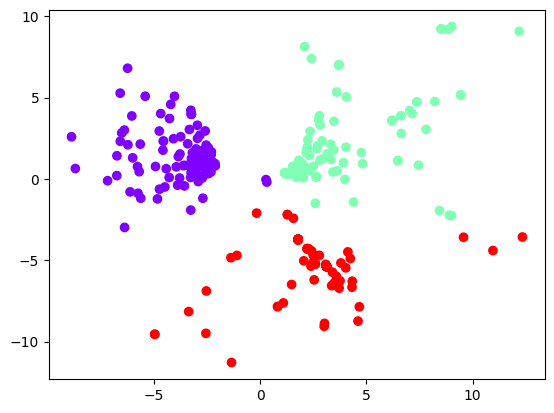

In [16]:
kmeans = KMeans(n_clusters = 3, random_state = 0)
cluster=kmeans.fit(coords)
plt.scatter(coords[:,0],coords[:,1], c=kmeans.labels_, cmap='rainbow')

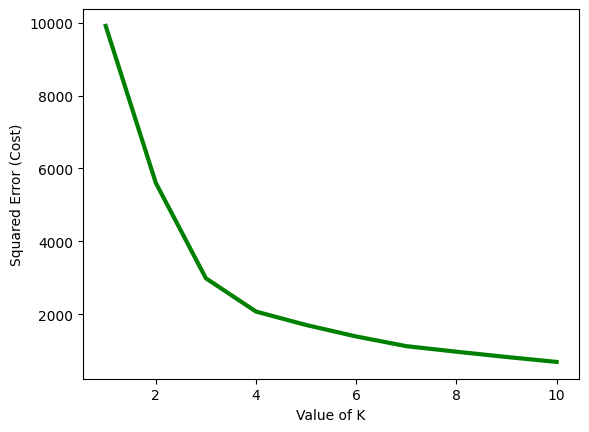

In [17]:

cost =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 500)
    kmeans.fit(coords)
     
    # calculates squared error
    # for the clustered points
    cost.append(kmeans.inertia_)    
 
# plot the cost against K values
plt.plot(range(1, 11), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show() # clear the plot
 
# the point of the elbow is the
# most optimal value for choosing k

In [8]:
## get dist_epitope
data1 = pd.read_csv("../netMHCpan_out copy/RSVA_F_test_dist.csv")
#data1=data1.groupby(['seq1','seq2'])['epitope_distance'].sum().reset_index()
## filter vaccine strain
data1 = data1[(data1['seq1'] != 'RSVB_pda_ancest') & (data1['seq2'] != 'RSVB_pda_ancest') &
             (data1['seq1'] != 'AF013255_vaccin') & (data1['seq2'] != 'AF013255_vaccin')]

## generate mirror matrix
data2 = data1 ## concate but switch seq1 and seq2
data=pd.concat([data1,data2.rename(columns={'seq1':'seq2','seq2':'seq1'})], ignore_index=True)
data= data.filter(['seq1','seq2','epitope_distance'])
data= data.pivot_table(index='seq1',columns='seq2',values='epitope_distance')
data=data.fillna(0)
data

seq2,AB848369-A-2013,AB848370-A-2012,AB848373-A-2013,AF035006_vaccin,FJ948820-A-1999,JF714709-A-2008,JF714710-A-2009,JF920046-A-2007,JF920047-A-2008,JF920048-A-2007,...,MN306031-A-2019,MN310477-A-2018,MN630091-A-2016,MN630097-A-2016,MN630105-A-2016,MT422269-A-2019,MT422270-A-2019,MT422273-A-2019,RSVA_pda_ancest,U63644_vaccine_
seq1,,,,,,,,,,,,,,,,,,,,,
AB848369-A-2013,0.000000,3.061600,7.697417,14.284900,6.552850,5.102283,3.622900,5.848783,5.848783,5.713383,...,1.832000,1.832000,4.472800,2.513200,3.949533,2.218500,2.218500,2.218500,8.800883,14.284900
AB848370-A-2012,3.061600,0.000000,7.095017,14.668300,6.114050,4.499883,3.020500,5.409983,5.409983,5.110983,...,1.229600,1.229600,4.858600,1.910800,3.347133,1.616100,1.616100,1.616100,8.362083,14.668300
AB848373-A-2013,7.697417,7.095017,0.000000,19.304117,10.749867,9.135700,7.656317,10.045800,10.045800,9.746800,...,5.865417,5.865417,9.494417,6.546617,7.982950,6.251917,6.251917,6.251917,12.997900,19.304117
AF035006_vaccin,14.284900,14.668300,19.304117,0.000000,10.545983,10.168417,14.065600,10.669117,10.669117,10.779517,...,13.438700,13.438700,15.941100,12.993300,13.984633,13.825200,13.825200,13.825200,8.623683,0.000000
FJ948820-A-1999,6.552850,6.114050,10.749867,10.545983,0.000000,1.614167,6.675350,2.360667,2.360667,2.225267,...,4.884450,4.884450,8.513450,5.565650,5.790450,5.270950,5.270950,5.270950,5.312767,10.545983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT422269-A-2019,2.218500,1.616100,6.251917,13.825200,5.270950,3.656783,1.650800,4.566883,4.566883,4.267883,...,0.386500,0.386500,4.015500,1.067700,2.504033,0.000000,0.000000,0.000000,7.518983,13.825200
MT422270-A-2019,2.218500,1.616100,6.251917,13.825200,5.270950,3.656783,1.650800,4.566883,4.566883,4.267883,...,0.386500,0.386500,4.015500,1.067700,2.504033,0.000000,0.000000,0.000000,7.518983,13.825200
MT422273-A-2019,2.218500,1.616100,6.251917,13.825200,5.270950,3.656783,1.650800,4.566883,4.566883,4.267883,...,0.386500,0.386500,4.015500,1.067700,2.504033,0.000000,0.000000,0.000000,7.518983,13.825200


In [9]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=0)## create mds module
results = mds.fit(data)
coords = results.embedding_
strain = data.columns
strain

Index(['AB848369-A-2013', 'AB848370-A-2012', 'AB848373-A-2013',
       'AF035006_vaccin', 'FJ948820-A-1999', 'JF714709-A-2008',
       'JF714710-A-2009', 'JF920046-A-2007', 'JF920047-A-2008',
       'JF920048-A-2007',
       ...
       'MN306031-A-2019', 'MN310477-A-2018', 'MN630091-A-2016',
       'MN630097-A-2016', 'MN630105-A-2016', 'MT422269-A-2019',
       'MT422270-A-2019', 'MT422273-A-2019', 'RSVA_pda_ancest',
       'U63644_vaccine_'],
      dtype='object', name='seq2', length=405)

In [12]:
df=pd.DataFrame({'strain':strain, 'mds1':coords[:, 0], 'mds2': coords[:, 1]})
df

,strain,mds1,mds2
0,AB848369-A-2013,-2.840148,2.687231
1,AB848370-A-2012,-3.190146,1.604376
2,AB848373-A-2013,-8.876447,2.591451
3,AF035006_vaccin,8.535154,9.204330
4,FJ948820-A-1999,2.158295,1.650198
...,...,...,...
400,MT422269-A-2019,-2.477186,0.742152
401,MT422270-A-2019,-2.477186,0.742152
402,MT422273-A-2019,-2.477186,0.742152
403,RSVA_pda_ancest,-1.375728,-4.839344


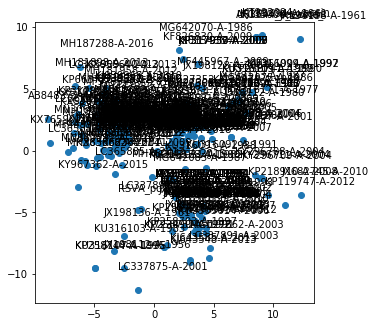

In [26]:
fig = plt.figure(figsize=(5,5))

plt.subplots_adjust(bottom = 0.1)
plt.scatter(coords[:, 0], coords[:, 1])

for label, x, y in zip(strain, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), 
        xytext = (-20, 20),
        textcoords = 'offset points'
    )
plt.show()

In [13]:
kmeans = KMeans(n_clusters = 3, random_state = 0)
cluster=kmeans.fit(coords)
plt.scatter(coords[:,0],coords[:,1], c=kmeans.labels_, cmap='rainbow')

NameError: name 'KMeans' is not defined

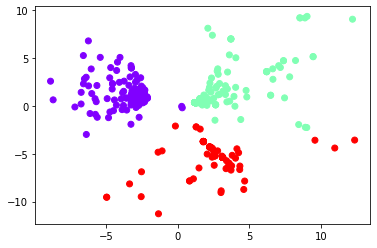

In [29]:
kmeans = KMeans(n_clusters = 3, random_state = 0)
cluster=kmeans.fit(coords)
plt.scatter(coords[:,0],coords[:,1], c=kmeans.labels_, cmap='rainbow')